# Gradient Descent and Stochastic Gradient Descent

In [1]:
!pip install mxnet
!pip install d2l

Traceback (most recent call last):
  File "/home/iserina/.local/bin/pip", line 7, in <module>
    from pip._internal import main
ModuleNotFoundError: No module named 'pip._internal'
Traceback (most recent call last):
  File "/home/iserina/.local/bin/pip", line 7, in <module>
    from pip._internal import main
ModuleNotFoundError: No module named 'pip._internal'


In [2]:
%matplotlib inline
import d2l
import math
from mxnet import nd
import numpy as np

Given object function $f(x) = x^2$, use $x=10$ as the initial value and $\eta=0.2$.

In [3]:
def gd(eta):
    x = 10
    results = [x]
    for i in range(10):
        x -= eta * 2 * x  # f(x) = x* the derivative of x is f'(x) = 2* x.
        results.append(x)
    print('epoch 10, x:', x)
    return results

res = gd(0.2)

epoch 10, x: 0.06046617599999997


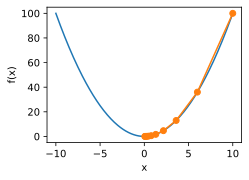

In [4]:
def show_trace(res):
    n = max(abs(min(res)), abs(max(res)), 10)
    f_line = np.arange(-n, n, 0.1)
    d2l.set_figsize()
    d2l.plt.plot(f_line, [x * x for x in f_line])
    d2l.plt.plot(res, [x * x for x in res], '-o')
    d2l.plt.xlabel('x')
    d2l.plt.ylabel('f(x)')

show_trace(res)

## A small Learning Rate


epoch 10, x: 3.4867844009999995


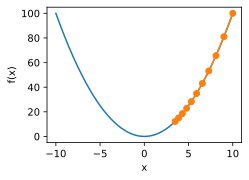

In [5]:
show_trace(gd(0.05))

## A large learning rate 

epoch 10, x: 61.917364224000096


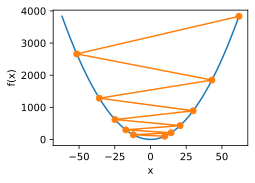

In [6]:
show_trace(gd(1.1))

## Gradient Descent in Multi-Dimensional Space

Given object function $f(\mathbf{x})=x_1^2+2x_2^2$, with (-5, -2) as the initial point. 

In [7]:
def train_2d(trainer):  
    x1, x2, s1, s2 = -5, -2, 0, 0 
    results = [(x1, x2)]
    for i in range(20):
        x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print('epoch %d, x1 %f, x2 %f' % (i + 1, x1, x2))
    return results



A plot function to show the trace.

In [8]:
def show_trace_2d(f, results):  
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = np.meshgrid(np.arange(-5.5, 1.0, 0.1), np.arange(-3.0, 1.0, 0.1))
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')

A proper learning rate

epoch 20, x1 -0.057646, x2 -0.000073


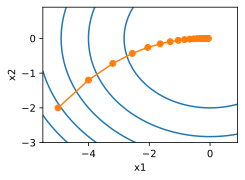

In [9]:
eta = 0.1
def f_2d(x1, x2):  
    return x1 ** 2 + 2 * x2 ** 2
def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 2 * x1, x2 - eta * 4 * x2, 0, 0)
show_trace_2d(f_2d, train_2d(gd_2d))

## Stochastic Gradient Descent (SGD)

Simulate the gradient noise.

epoch 20, x1 -0.071118, x2 -0.144548


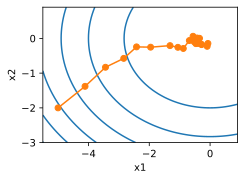

In [10]:
def sgd_2d(x1, x2, s1, s2):
    return (x1 - eta * (2 * x1 + np.random.normal(0.1)),
            x2 - eta * (4 * x2 + np.random.normal(0.1)), 0, 0)
show_trace_2d(f_2d, train_2d(sgd_2d))

In [11]:
#The Momentum Method

epoch 20, x1 -0.062843, x2 0.001202


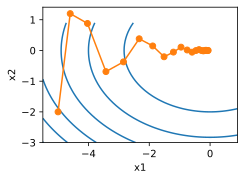

In [12]:
def momentum_2d(x1, x2, v1, v2):
    v1 = gamma * v1 + eta * 0.2 * x1
    v2 = gamma * v2 + eta * 4 * x2
    return x1 - v1, x2 - v2, v1, v2

eta, gamma = 0.4, 0.5
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

In [ ]:
Now, when we use a larger learning rate (𝜂=0.6), the independent variable will no longer diverge.

epoch 20, x1 0.007188, x2 0.002553


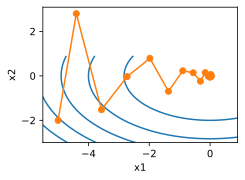

In [13]:
eta = 0.6
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

In [14]:
##Expanding the velocity variable 𝐯_𝑡

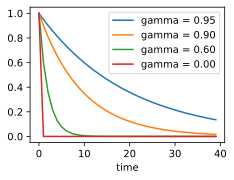

In [15]:
gammas = [0.95, 0.9, 0.6, 0]
d2l.set_figsize((3.5, 2.5))
for gamma in gammas:
    x = nd.arange(40).asnumpy()
    d2l.plt.plot(x, gamma ** x, label='gamma = %.2f'%gamma)
d2l.plt.xlabel('time')
d2l.plt.legend();